In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn import metrics as mt

%matplotlib inline
pylab.rcParams['figure.figsize'] = 6,4

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [30]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe["median_house_value"] = california_housing_dataframe["median_house_value"].apply(lambda x: 1 if x > 100000.0 else 0)
california_housing_dataframe.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,0


In [31]:
california_housing_dataframe.count()

longitude             17000
latitude              17000
housing_median_age    17000
total_rooms           17000
total_bedrooms        17000
population            17000
households            17000
median_income         17000
median_house_value    17000
dtype: int64

In [0]:
data_train = california_housing_dataframe[:11900]
data_test = california_housing_dataframe[11900:]

In [33]:
print(data_train.count())
print(data_test.count())

longitude             11900
latitude              11900
housing_median_age    11900
total_rooms           11900
total_bedrooms        11900
population            11900
households            11900
median_income         11900
median_house_value    11900
dtype: int64
longitude             5100
latitude              5100
housing_median_age    5100
total_rooms           5100
total_bedrooms        5100
population            5100
households            5100
median_income         5100
median_house_value    5100
dtype: int64


In [37]:
# Distribución del Target
print(data_train["median_house_value"].value_counts(dropna=False))
print(data_train["median_house_value"].value_counts(dropna=False, normalize = True)*100)

1    9745
0    2155
Name: median_house_value, dtype: int64
1    81.890756
0    18.109244
Name: median_house_value, dtype: float64


In [39]:
# Generar estadisticos básicos para cada variable:
### count: Count number of non-NA/null observations.	
### mean: Mean of the values.
### std: Standard deviation of the observations.
### min: Minimum of the values in the object.
### X%: The value of Quartil: 25% - Q1 , 50% - Q2, 75% - Q3
### max: Maximum of the values in the object.
data_train.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
longitude,11900.0,-118.445868,1.219846,-121.3600,-118.86000,-118.21000,-117.7800,-114.3100
latitude,11900.0,34.582482,1.593813,32.5400,33.82000,34.05000,34.4300,41.8200
housing_median_age,11900.0,27.480756,12.066142,1.0000,17.00000,28.00000,36.0000,52.0000
total_rooms,11900.0,2655.122521,2259.588716,2.0000,1451.00000,2111.50000,3144.2500,37937.0000
total_bedrooms,11900.0,547.401513,434.755158,2.0000,299.00000,438.00000,653.0000,5471.0000
population,11900.0,1477.440420,1174.909381,3.0000,816.00000,1208.00000,1779.0000,35682.0000
households,11900.0,505.572857,391.947580,2.0000,283.00000,411.00000,606.0000,5189.0000
median_income,11900.0,3.795066,1.854795,0.4999,2.51495,3.46025,4.6474,15.0001
median_house_value,11900.0,0.818908,0.385111,0.0000,1.00000,1.00000,1.0000,1.0000


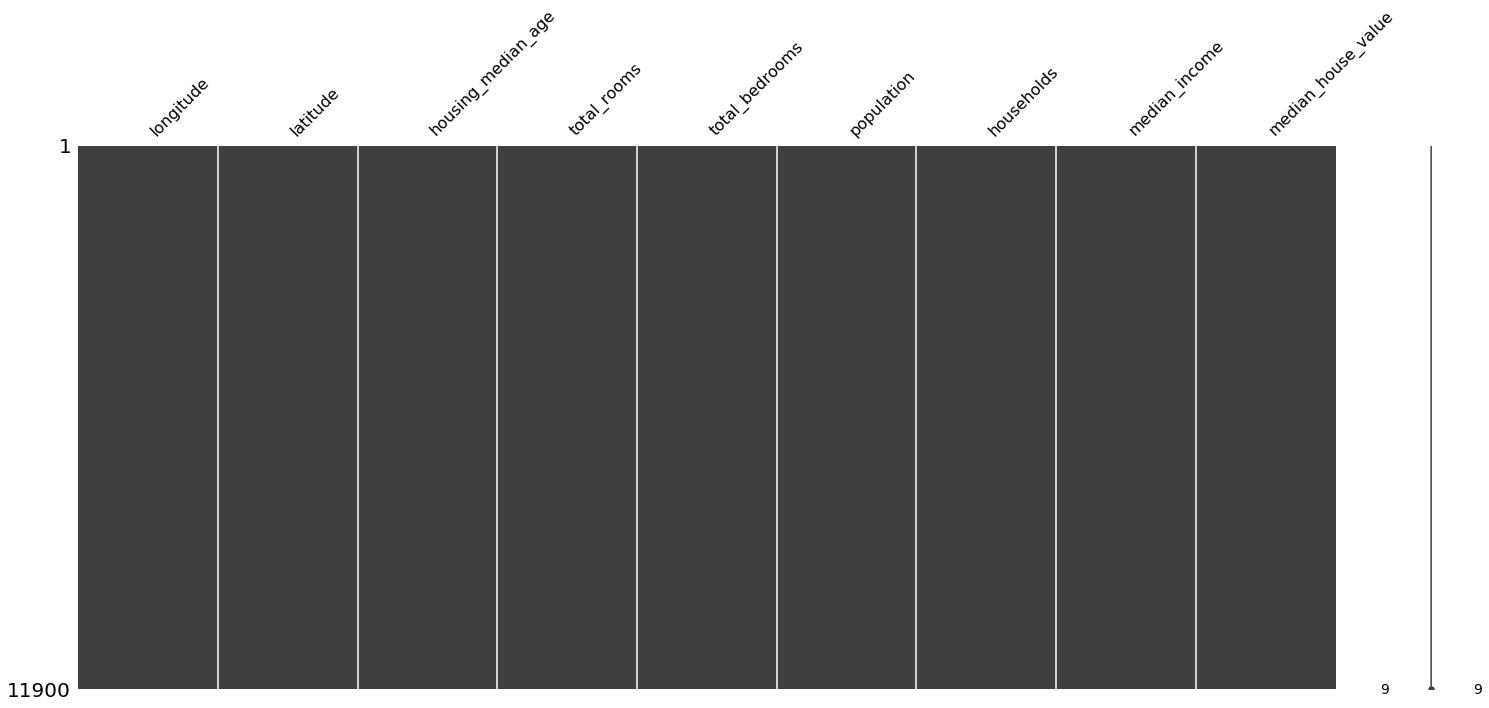

In [41]:
import missingno as msno
msno.matrix(data_train)

In [46]:
# New Feature 1
data_train["rooms_per_person"] = (data_train["total_rooms"] / data_train["population"])
data_test["rooms_per_person"] = (data_test["total_rooms"] / data_test["population"])
#longitude	latitude	housing_median_age	total_rooms	total_bedrooms	population	households	median_income	median_house_value
#tmp_byAdultoMayor_medianMontoMes = ds_train.groupby(['AdultoMayor'])['MontoCargadoMes'].median().round()
#tmp_byAdultoMayor_medianMontoMes
print(data_train.head(10))

   longitude  latitude  ...  median_house_value  rooms_per_person
0    -114.31     34.19  ...                   0          5.529064
1    -114.47     34.40  ...                   0          6.775908
2    -114.56     33.69  ...                   0          2.162162
3    -114.57     33.64  ...                   0          2.914563
4    -114.57     33.57  ...                   0          2.330128
5    -114.58     33.63  ...                   0          2.067064
6    -114.58     33.61  ...                   0          1.579033
7    -114.59     34.83  ...                   0          2.165333
8    -114.59     33.61  ...                   0          1.528079
9    -114.60     34.83  ...                   0          1.902160

[10 rows x 10 columns]


In [47]:
cols = data_train.columns.tolist()
cols = cols[-1:] + cols[:-1]
data_train = data_train[cols]  #    OR    df = df.ix[:, cols]
print(data_train.head(10))

   rooms_per_person  longitude  ...  median_income  median_house_value
0          5.529064    -114.31  ...         1.4936                   0
1          6.775908    -114.47  ...         1.8200                   0
2          2.162162    -114.56  ...         1.6509                   0
3          2.914563    -114.57  ...         3.1917                   0
4          2.330128    -114.57  ...         1.9250                   0
5          2.067064    -114.58  ...         3.3438                   0
6          1.579033    -114.58  ...         2.6768                   0
7          2.165333    -114.59  ...         1.7083                   0
8          1.528079    -114.59  ...         2.1782                   0
9          1.902160    -114.60  ...         2.1908                   0

[10 rows x 10 columns]


In [0]:
features_to_model = list(data_train.columns)
TARGET = 'median_house_value'
features_to_model.remove(TARGET)
X = data_train[features_to_model]
y = data_train[TARGET]
X_summit = data_test[features_to_model]

In [50]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.70, random_state=9)
print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

(8330, 8330) (3570, 3570)


In [52]:
from sklearn.linear_model import LogisticRegression
# Create  model objet 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model_rlog = LogisticRegression(C=0.01, max_iter= 100, random_state=0, n_jobs = 4, penalty = 'l2')
# Fit the model:
model_rlog.fit(X_train, y_train)
model = model_rlog 
df_weights = pd.DataFrame({'feature':X_train.columns.values, 'beta': np.round(model_rlog.coef_[0],4) })
df_weights

,feature,beta
0,rooms_per_person,0.2075
1,longitude,-0.1493
2,latitude,-0.6023
3,housing_median_age,0.0045
4,total_rooms,-0.0007
5,total_bedrooms,0.0022
6,population,-0.0002
7,households,0.0022
8,median_income,1.3676


In [0]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [54]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8606242496998799
Accuracy - Test : 0.8523809523809524


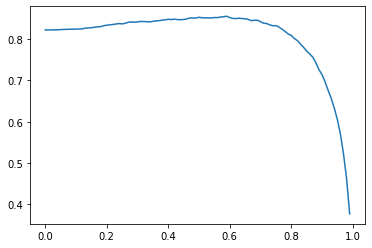

In [55]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [56]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.59


In [57]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8619447779111644
Accuracy - Test : 0.8549019607843137
